**Gradient Boost**

Mean Squared Error: 2580.35915021166


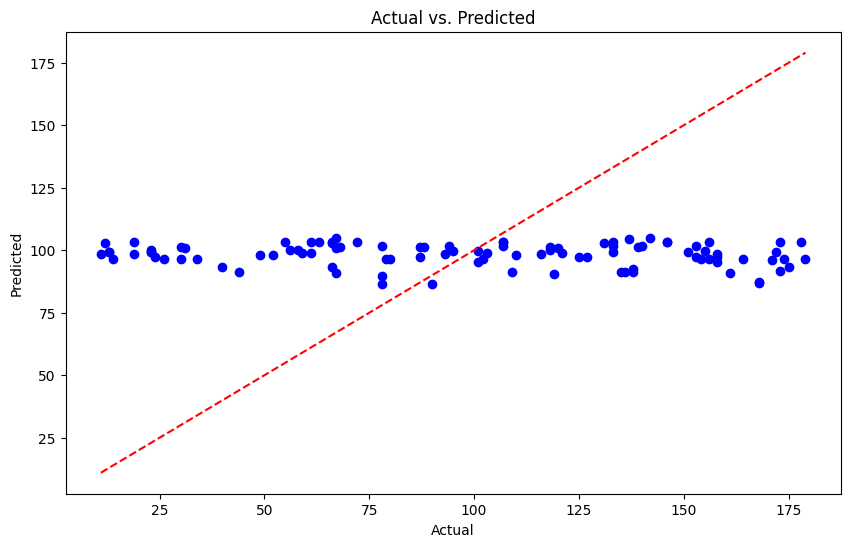

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

# Load data from CSV
data = pd.read_csv('/content/sample_data/Project_Dataset (1).csv')

# Separate features and target variable
X = data.drop('No. of days', axis=1)
y = data['No. of days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()

# Define hyperparameters for optimization
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Perform Grid Search Cross Validation for hyperparameter tuning
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Initialize Gradient Boosting Regressor with best parameters
gb_model = GradientBoostingRegressor(**best_params)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred = gb_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plot predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


**SVG**

In [4]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Load your data into a DataFrame
data = pd.read_csv('/content/sample_data/Project_Dataset (1).csv')

# Define classes or ranges for the number of days
data['Duration_Class'] = pd.cut(data['No. of days'], bins=[0, 30, 60, float('inf')], labels=['Short', 'Medium', 'Long'])

# Separate features and target variable
X = data.drop(['No. of days', 'Duration_Class'], axis=1)
y = data['Duration_Class']

# Preprocess the data
# For SVM, it's important to scale the features
# We'll use StandardScaler for this purpose
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize SVM classifier
svm_classifier = make_pipeline(StandardScaler(), SVC())

# Train the model
svm_classifier.fit(X_train, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Visualize the results if needed (e.g., plot confusion matrix, ROC curve)


              precision    recall  f1-score   support

        Long       0.76      1.00      0.86        76
      Medium       0.00      0.00      0.00        10
       Short       0.00      0.00      0.00        14

    accuracy                           0.76       100
   macro avg       0.25      0.33      0.29       100
weighted avg       0.58      0.76      0.66       100

Confusion Matrix:
[[76  0  0]
 [10  0  0]
 [14  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


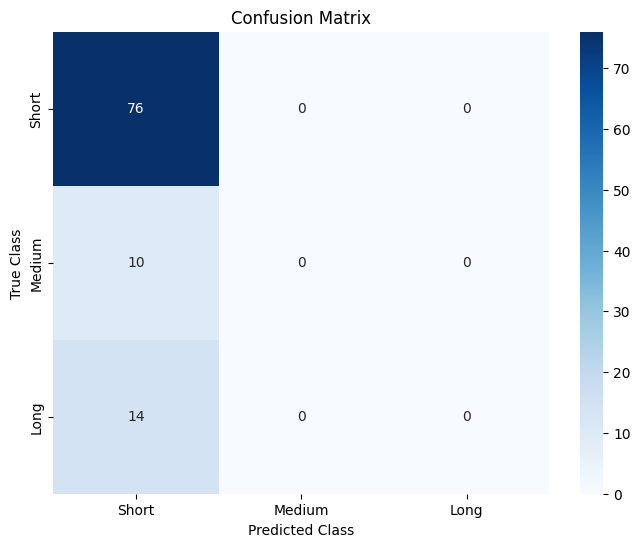

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Short', 'Medium', 'Long'], yticklabels=['Short', 'Medium', 'Long'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion Matrix')
plt.show()

In [10]:
# Sample input data
sample_input = {
    'Domain': [1],
    'No. of team members': [0],
    'Web': [1],
    'Mobile': [1],
    'IOT': [1],
    'Desktop': [0],
    'Team size': [4],
    'Budget': [25000]
}

# Convert sample input to DataFrame
sample_df = pd.DataFrame(sample_input)

# Preprocess the sample input (scale the features)
sample_scaled = scaler.transform(sample_df)

# Make prediction
predicted_class = svm_classifier.predict(sample_scaled)[0]

# Map the predicted class to its corresponding duration range
duration_mapping = {'Short': '0-30 days', 'Medium': '31-60 days', 'Long': '61+ days'}
predicted_duration = duration_mapping[predicted_class]

print("Predicted Duration Range:", predicted_duration)


Predicted Duration Range: 61+ days


**Random Forest**

In [13]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid=param_grid_rf, cv=5, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params_rf, random_state=42)
best_rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred_rf = best_rf_classifier.predict(X_test)

# Evaluate the model
print("Best Parameters:", best_params_rf)
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

# Sample input data for prediction
sample_input = {
    'Domain': [1],
    'No. of team members': [7],
    'Web': [1],
    'Mobile': [1],
    'IOT': [0],
    'Desktop': [1],
    'Team size': [13],
    'Budget': [48000]
}

# Convert sample input to DataFrame
sample_df = pd.DataFrame(sample_input)

# Preprocess the sample input (scale the features)
sample_scaled = scaler.transform(sample_df)

# Make prediction using Random Forest model
predicted_class_rf = best_rf_classifier.predict(sample_scaled)[0]

# Map the predicted class to its corresponding duration range
predicted_duration_rf = duration_mapping[predicted_class_rf]

print("Predicted Duration Range using Random Forest:", predicted_duration_rf)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

        Long       0.76      1.00      0.86        76
      Medium       0.00      0.00      0.00        10
       Short       0.00      0.00      0.00        14

    accuracy                           0.76       100
   macro avg       0.25      0.33      0.29       100
weighted avg       0.58      0.76      0.66       100

Confusion Matrix:
[[76  0  0]
 [10  0  0]
 [14  0  0]]
Predicted Duration Range using Random Forest: 61+ days


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**SVG exact Date**

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# Load the CSV file
data = pd.read_csv('/content/sample_data/Project_Dataset (1).csv')  # Replace 'your_data.csv' with the actual file path

# Separate features (X) and target variable (y)
X = data.drop(['No. of days', 'No. of team members'], axis=1)  # Dropping 'No. of team members' column
y = data['No. of days']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for SVR
param_grid_svr = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 1]
}

# Initialize SVR
svr = SVR()

# Initialize GridSearchCV for SVR
grid_search_svr = GridSearchCV(estimator=svr, param_grid=param_grid_svr, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search_svr.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_svr = grid_search_svr.best_params_

# Train the model with the best parameters
best_svr = SVR(**best_params_svr)
best_svr.fit(X_train_scaled, y_train)

# Make prediction for sample input (dropping 'No. of team members' column)
sample_input = {
    'Domain': [3],
    'Web': [1],
    'Mobile': [1],
    'IOT': [1],
    'Desktop': [1],
    'Team size': [6],
    'Budget': [10000]
}

sample_df = pd.DataFrame(sample_input)
predicted_days = best_svr.predict(sample_df)[0]

print("Predicted Number of Days using SVR:", predicted_days)


Predicted Number of Days using SVR: 100.52340818713783


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


**Random Forest Exact Date**

In [56]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the CSV file
data = pd.read_csv('/content/sample_data/Project_Dataset (1).csv')

# Separate features (X) and target variable (y)
X = data.drop(['No. of days', 'No. of team members'], axis=1)  # Features
y = data['No. of days']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV for Random Forest Regressor
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train the model with the best parameters
best_rf_regressor = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_regressor.fit(X_train_scaled, y_train)

# Make prediction for sample input
sample_input = {
    'Domain': [3],
    'Web': [1],
    'Mobile': [1],
    'IOT': [1],
    'Desktop': [1],
    'Team size': [10],
    'Budget': [25000]
}

sample_df = pd.DataFrame(sample_input)
sample_scaled = scaler.transform(sample_df)
predicted_days = best_rf_regressor.predict(sample_scaled)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)


Predicted Number of Days using Random Forest Regressor: 88.55181286531848


In [62]:

# Make prediction for sample input
sample_input = {
    'Domain': [2],
    'Web': [0],
    'Mobile': [0],
    'IOT': [1],
    'Desktop': [1],
    'Team size': [10],
    'Budget': [25000]
}

sample_df = pd.DataFrame(sample_input)
sample_scaled = scaler.transform(sample_df)
predicted_days = best_rf_regressor.predict(sample_scaled)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)

Predicted Number of Days using Random Forest Regressor: 81.82867463315758


In [65]:

# Make prediction for sample input
sample_input = {
    'Domain': [2],
    'Web': [0],
    'Mobile': [0],
    'IOT': [1],
    'Desktop': [1],
    'Team size': [10],
    'Budget': [25000]
}

sample_df = pd.DataFrame(sample_input)
print(sample_df)
sample_scaled = scaler.transform(sample_df)
print(sample_scaled)
predicted_days = best_rf_regressor.predict(sample_scaled)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)

   Domain  Web  Mobile  IOT  Desktop  Team size  Budget
0       2    0       0    1        1         10   25000
[[ 0.04594768 -1.02532046 -0.91832346  0.92761259  0.92761259  0.38488766
  -0.15744019]]
Predicted Number of Days using Random Forest Regressor: 81.82867463315758


In [45]:
import joblib

# Save the trained model to a file
joblib.dump(best_rf_regressor, '/content/sample_data/random_forest_regressor_model_2.pkl')

# Provide the download link
print("Model saved successfully. You can download it from the following link:")
print("Download link: https://path_to_your_website/random_forest_regressor_model.pkl")


Model saved successfully. You can download it from the following link:
Download link: https://path_to_your_website/random_forest_regressor_model.pkl


In [55]:
import joblib
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the saved model
loaded_rf_regressor = joblib.load('/content/sample_data/random_forest_regressor_model_2.pkl')

# Define a scaler to scale new input data
scaler = StandardScaler()

# Sample input data for prediction
sample_input = {
    'Domain': [3],
    'Web': [1],
    'Mobile': [1],
    'IOT': [1],
    'Desktop': [1],
    'Team size': [10],
    'Budget': [25000]
}
sample_df = pd.DataFrame(sample_input)

# Scale the sample input data
sample_scaled = scaler.fit_transform(sample_df)

# Make prediction using the loaded model
predicted_days = loaded_rf_regressor.predict(sample_scaled)[0]

print("Predicted Number of Days using Random Forest Regressor (loaded model):", predicted_days)


Predicted Number of Days using Random Forest Regressor (loaded model): 106.92585758935682


**Random Forest changed**

In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the CSV file
data = pd.read_csv('/content/sample_data/Project_Dataset (1).csv')

# Separate features (X) and target variable (y)
X = data.drop(['No. of days', 'No. of team members'], axis=1)  # Features
y = data['No. of days']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV for Random Forest Regressor
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train the model with the best parameters
best_rf_regressor = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_regressor.fit(X_train_scaled, y_train)

# Make prediction for sample input
sample_input = [[3, 1, 1, 1, 1, 6, 499944]]
sample_scaled = scaler.transform(sample_input)
predicted_days = best_rf_regressor.predict(sample_scaled)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)


Predicted Number of Days using Random Forest Regressor: 95.95970432670109


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [81]:

sample_input = [[1, 1, 1, 1, 1, 1, 23080]]
sample_scaled = scaler.transform(sample_input)
predicted_days = best_rf_regressor.predict(sample_scaled)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)

Predicted Number of Days using Random Forest Regressor: 108.52564568817799


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**RF with hypo tuning**

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the CSV file
data = pd.read_csv('/content/sample_data/Project_Dataset (1).csv')

# Separate features (X) and target variable (y)
X = data.drop(['No. of days', 'No. of team members'], axis=1)  # Features
y = data['No. of days']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Random Forest Regressor
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV for Random Forest Regressor
grid_search_rf = GridSearchCV(estimator=rf_regressor, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error')

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_

# Train the model with the best parameters
best_rf_regressor = grid_search_rf.best_estimator_
best_rf_regressor.fit(X_train_scaled, y_train)

# Make predictions for test set
y_pred = best_rf_regressor.predict(X_test_scaled)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

# Make prediction for sample input
sample_input = [[3, 1, 1, 1, 1, 6, 499944]]
sample_scaled = scaler.transform(sample_input)
predicted_days = best_rf_regressor.predict(sample_scaled)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)


Mean Squared Error on Test Set: 2558.852995089702
Predicted Number of Days using Random Forest Regressor: 95.95970432670109


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [98]:
# Make prediction for sample input
sample_input = [[3, 0, 1, 1, 0, 3, 23080]]
predicted_days = best_rf_regressor.predict(sample_input)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)

Predicted Number of Days using Random Forest Regressor: 88.55181286531848


In [95]:
# Make prediction for sample input
sample_input = [[3, 1, 1, 1, 0, 3, 23080]]
sample_scaled = scaler.transform(sample_input)
predicted_days = best_rf_regressor.predict(sample_scaled)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)

Predicted Number of Days using Random Forest Regressor: 111.7446294807358


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**RF without Scale**

In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the CSV file
data = pd.read_csv('/content/sample_data/Project_Dataset (1).csv')

# Separate features (X) and target variable (y)
X = data.drop(['No. of days', 'No. of team members'], axis=1)  # Features
y = data['No. of days']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter distributions for Random Forest Regressor
param_dist_rf = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize RandomizedSearchCV for Random Forest Regressor
random_search_rf = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist_rf, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42)

# Fit the model
random_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params_rf = random_search_rf.best_params_

# Train the model with the best parameters
best_rf_regressor = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_regressor.fit(X_train, y_train)

# Make predictions for test set
y_pred = best_rf_regressor.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

# Make prediction for sample input
sample_input = [[2, 1, 1, 1, 0, 6, 23080]]
predicted_days = best_rf_regressor.predict(sample_input)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Mean Squared Error on Test Set: 2520.60185316875
Predicted Number of Days using Random Forest Regressor: 103.68755626560835


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [120]:
sample_input = [[3, 1, 1, 1, 1, 20, 23080]]
predicted_days = best_rf_regressor.predict(sample_input)[0]

print("Predicted Number of Days using Random Forest Regressor:", predicted_days)

Predicted Number of Days using Random Forest Regressor: 101.19177117927202


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [121]:
import joblib

# Define the file path to save the model
model_file_path = '/content/sample_data/random_forest_regressor_model_final.pkl'

# Save the trained model to a file
joblib.dump(best_rf_regressor, model_file_path)

print("Model saved successfully.")


Model saved successfully.


In [122]:
import joblib

# Define the file path where the model is saved
model_file_path = '/content/sample_data/random_forest_regressor_model_final.pkl'

# Load the saved model from the file
loaded_rf_regressor = joblib.load(model_file_path)

# Make prediction for sample input
sample_input = [[2, 1, 1, 1, 0, 6, 23080]]
predicted_days = loaded_rf_regressor.predict(sample_input)[0]

print("Predicted Number of Days using Loaded Random Forest Regressor:", predicted_days)


Predicted Number of Days using Loaded Random Forest Regressor: 103.68755626560835


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
